In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# 데이터 파일 불러오기
df = pd.read_csv('./games.csv')
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-05-26,42000102,Final,1610612755,1610612764,2020,1610612755,120.0,0.557,0.684,...,26.0,45.0,1610612764,95.0,0.402,0.633,0.091,22.0,40.0,1
1,2021-05-26,42000132,Final,1610612752,1610612737,2020,1610612752,101.0,0.383,0.739,...,15.0,54.0,1610612737,92.0,0.369,0.818,0.273,17.0,41.0,1
2,2021-05-26,42000142,Final,1610612762,1610612763,2020,1610612762,141.0,0.544,0.774,...,28.0,42.0,1610612763,129.0,0.541,0.763,0.348,20.0,33.0,1
3,2021-05-25,42000112,Final,1610612751,1610612738,2020,1610612751,130.0,0.523,0.955,...,31.0,46.0,1610612738,108.0,0.424,0.783,0.353,23.0,43.0,1
4,2021-05-25,42000152,Final,1610612756,1610612747,2020,1610612756,102.0,0.465,0.933,...,21.0,31.0,1610612747,109.0,0.450,0.871,0.303,24.0,39.0,0


## 홈팀의 승률과 슛 성공률이 그렇지 않은 팀보다 높을 것이다.

In [21]:
# 컬럼 이름 바꾸기
df.columns = ['경기 일자', '경기ID', '경기 상태', '홈팀ID', '어웨이팀ID', '시즌', '홈팀ID2', '홈팀점수', '홈팀 야투율', '홈팀 자유투 확률', '홈팀 3점슛 확률', '홈팀 어시스트', '홈팀 리바운드', '어웨이팀ID', '어웨이팀점수', '어웨이팀 야투율', '어웨이팀 자유투 확률', '어웨이팀 3점슛 확률', '어웨이팀 어시스트', '어웨이팀 리바운드', '홈팀 승리']
df.head()

,경기 일자,경기ID,경기 상태,홈팀ID,어웨이팀ID,시즌,홈팀ID2,홈팀점수,홈팀 야투율,홈팀 자유투 확률,...,홈팀 어시스트,홈팀 리바운드,어웨이팀ID,어웨이팀점수,어웨이팀 야투율,어웨이팀 자유투 확률,어웨이팀 3점슛 확률,어웨이팀 어시스트,어웨이팀 리바운드,홈팀 승리
0,2021-05-26,42000102,Final,1610612755,1610612764,2020,1610612755,120.0,0.557,0.684,...,26.0,45.0,1610612764,95.0,0.402,0.633,0.091,22.0,40.0,1
1,2021-05-26,42000132,Final,1610612752,1610612737,2020,1610612752,101.0,0.383,0.739,...,15.0,54.0,1610612737,92.0,0.369,0.818,0.273,17.0,41.0,1
2,2021-05-26,42000142,Final,1610612762,1610612763,2020,1610612762,141.0,0.544,0.774,...,28.0,42.0,1610612763,129.0,0.541,0.763,0.348,20.0,33.0,1
3,2021-05-25,42000112,Final,1610612751,1610612738,2020,1610612751,130.0,0.523,0.955,...,31.0,46.0,1610612738,108.0,0.424,0.783,0.353,23.0,43.0,1
4,2021-05-25,42000152,Final,1610612756,1610612747,2020,1610612756,102.0,0.465,0.933,...,21.0,31.0,1610612747,109.0,0.450,0.871,0.303,24.0,39.0,0


In [22]:
# 사용 안할 컬럼 제거
df.drop(['경기 일자', '경기ID', '경기 상태', '홈팀ID', '어웨이팀ID', '홈팀ID2'], axis=1, inplace=True)
df.head()

,시즌,홈팀점수,홈팀 야투율,홈팀 자유투 확률,홈팀 3점슛 확률,홈팀 어시스트,홈팀 리바운드,어웨이팀점수,어웨이팀 야투율,어웨이팀 자유투 확률,어웨이팀 3점슛 확률,어웨이팀 어시스트,어웨이팀 리바운드,홈팀 승리
0,2020,120.0,0.557,0.684,0.429,26.0,45.0,95.0,0.402,0.633,0.091,22.0,40.0,1
1,2020,101.0,0.383,0.739,0.364,15.0,54.0,92.0,0.369,0.818,0.273,17.0,41.0,1
2,2020,141.0,0.544,0.774,0.487,28.0,42.0,129.0,0.541,0.763,0.348,20.0,33.0,1
3,2020,130.0,0.523,0.955,0.447,31.0,46.0,108.0,0.424,0.783,0.353,23.0,43.0,1
4,2020,102.0,0.465,0.933,0.308,21.0,31.0,109.0,0.450,0.871,0.303,24.0,39.0,0


## 홈팀의 득점 확률과 총 득점수 평균의 시즌별 분석

In [23]:
# 홈팀의 시즌별 평균 데이터베이스 생성
home_means = df.groupby('시즌')['홈팀점수'].mean().to_frame()
home_means['홈팀 야투율'] = df.groupby('시즌')['홈팀 야투율'].mean().to_frame()
home_means['홈팀 3점슛 확률'] = df.groupby('시즌')['홈팀 3점슛 확률'].mean().to_frame()
home_means.reset_index(inplace=True)
home_means

,시즌,홈팀점수,홈팀 야투율,홈팀 3점슛 확률
0,2003,94.907465,0.445108,0.342993
1,2004,98.604993,0.454632,0.354970
2,2005,98.406425,0.460089,0.350063
3,2006,99.849190,0.462074,0.353187
4,2007,101.273565,0.463230,0.359906
5,2008,100.922807,0.463702,0.363791
6,2009,101.654494,0.465970,0.349756
7,2010,100.756681,0.463857,0.355870
8,2011,97.392210,0.453630,0.344514
9,2012,99.381690,0.458730,0.363454


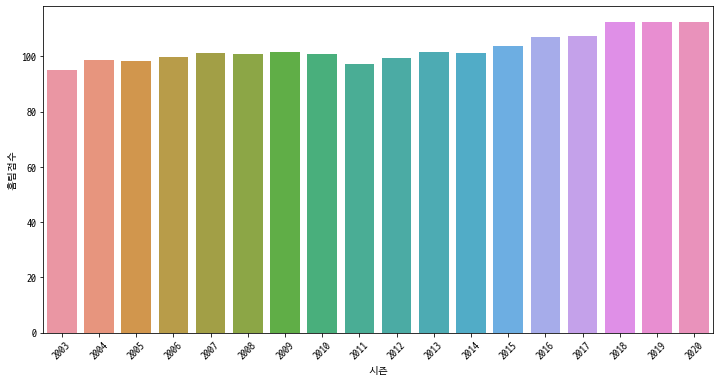

In [24]:
# 홈팀의 시즌별 득점 수 평균 시각화
plt.subplots(figsize=(12,6))
plt.xticks(rotation=45)
sns.barplot(x='시즌', y='홈팀점수', data=home_means)
plt.show()

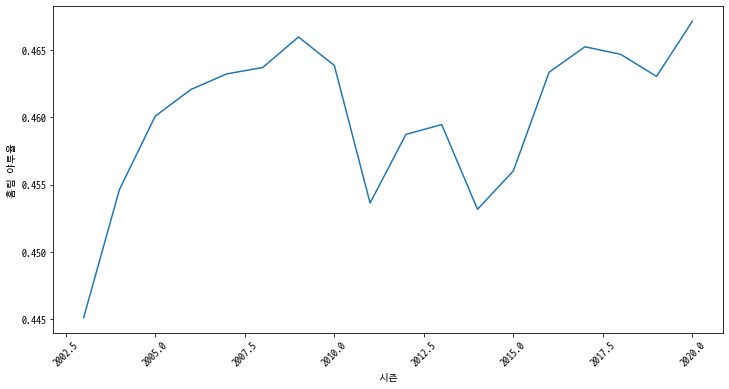

In [25]:
# 홈팀의 시즌별 야투율(성공한 슛 개수/총 시도한 슛 개수) 평균 시각화
plt.subplots(figsize=(12,6))
plt.xticks(rotation=45)
sns.lineplot(x='시즌', y='홈팀 야투율', data=home_means)
plt.show()

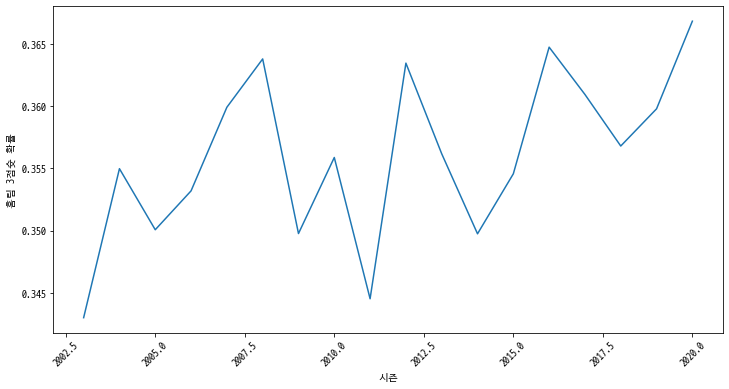

In [26]:
# 홈팀의 시즌별 3점슛 확률 시각화
plt.subplots(figsize=(12,6))
plt.xticks(rotation=45)
sns.lineplot(x='시즌', y='홈팀 3점슛 확률', data=home_means)
plt.show()

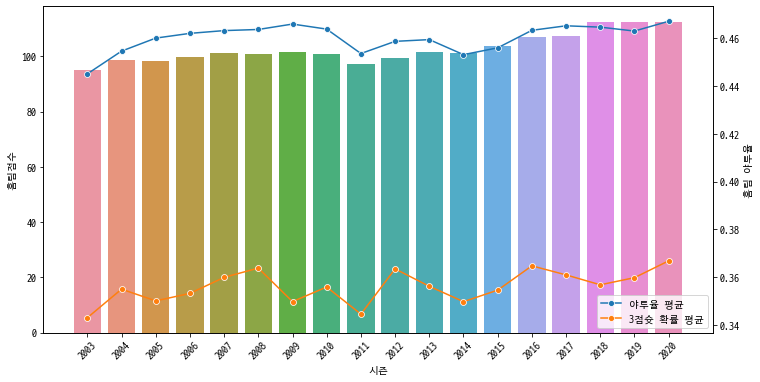

In [27]:
# 홈팀의 시즌별 그래프 병합
fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(rotation=45)
sns.barplot(x='시즌', y='홈팀점수', data=home_means.reset_index(), ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(x='index', y='홈팀 야투율', marker='o', data=home_means.reset_index(), ax=ax2)
sns.lineplot(x='index', y='홈팀 3점슛 확률', marker='o', data=home_means.reset_index(), ax=ax2)
plt.legend(['야투율 평균', '3점슛 확률 평균'])
plt.show()

## 어웨이팀의 득점 확률과 총 득점수 평균의 시즌별 분석

In [28]:
# 어웨이팀(원정팀)의 시즌별 평균 데이터베이스 생성
away_means = df.groupby('시즌')['어웨이팀점수'].mean().to_frame()
away_means['어웨이팀 야투율'] = df.groupby('시즌')['어웨이팀 야투율'].mean().to_frame()
away_means['어웨이팀 3점슛 확률'] = df.groupby('시즌')['어웨이팀 3점슛 확률'].mean().to_frame()
away_means.reset_index(inplace=True)
away_means

,시즌,어웨이팀점수,어웨이팀 야투율,어웨이팀 3점슛 확률
0,2003,91.092535,0.431240,0.330227
1,2004,95.381791,0.441678,0.346637
2,2005,95.172486,0.448051,0.355920
3,2006,96.944327,0.450718,0.348088
4,2007,97.549256,0.448358,0.352690
5,2008,97.903860,0.451627,0.357941
6,2009,98.745787,0.456085,0.350468
7,2010,97.384669,0.450444,0.348895
8,2011,94.429348,0.441467,0.338460
9,2012,96.114085,0.445188,0.343558


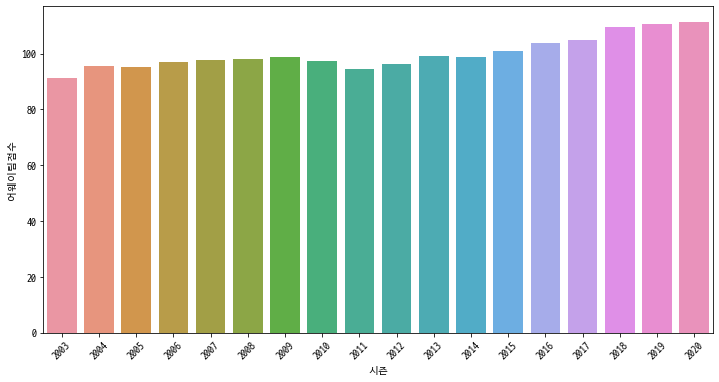

In [29]:
# 어웨이팀의 시즌별 득점 수 평균 시각화
plt.subplots(figsize=(12,6))
plt.xticks(rotation=45)
sns.barplot(x='시즌', y='어웨이팀점수', data=away_means)
plt.show()

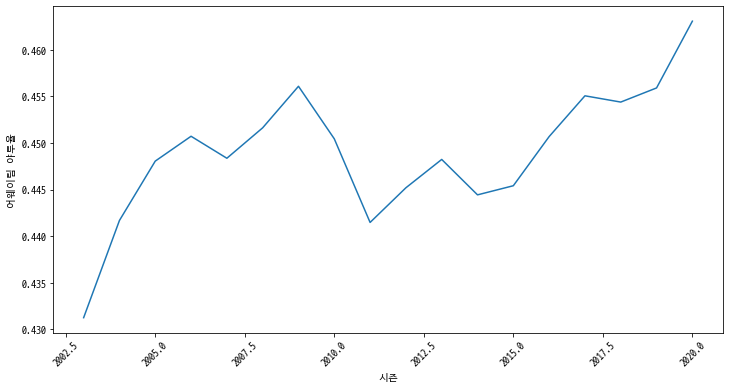

In [30]:
# 어웨이팀의 시즌별 야투율 평균 시각화
plt.subplots(figsize=(12,6))
plt.xticks(rotation=45)
sns.lineplot(x='시즌', y='어웨이팀 야투율', data=away_means)
plt.show()

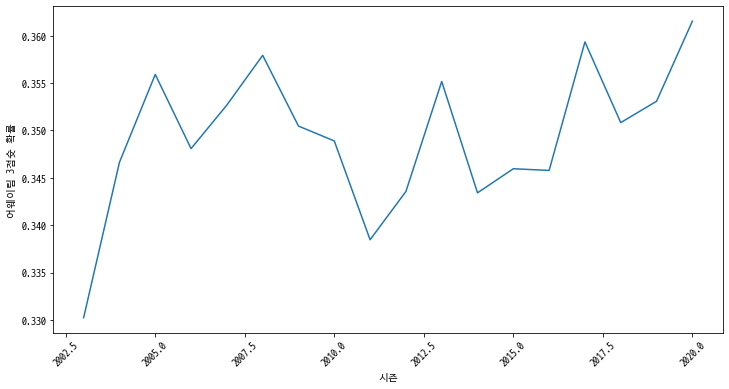

In [31]:
# 어웨이팀의 시즌별 3점슛 확률 시각화
plt.subplots(figsize=(12,6))
plt.xticks(rotation=45)
sns.lineplot(x='시즌', y='어웨이팀 3점슛 확률', data=away_means)
plt.show()

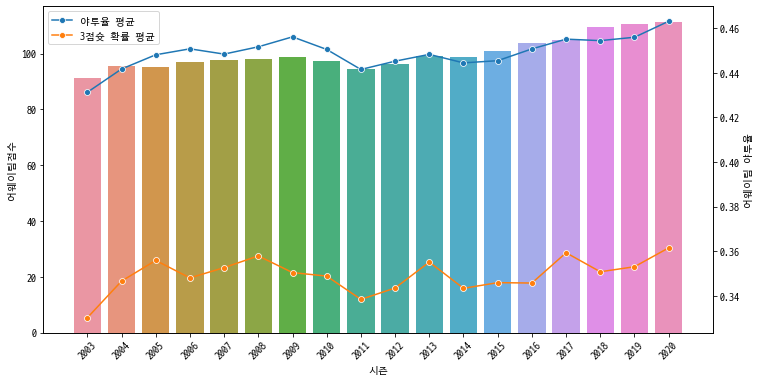

In [32]:
# 어웨이팀의 시즌별 그래프 병합
fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(rotation=45)
sns.barplot(x='시즌', y='어웨이팀점수', data=away_means.reset_index(), ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(x='index', y='어웨이팀 야투율', marker='o', data=away_means.reset_index(), ax=ax2)
sns.lineplot(x='index', y='어웨이팀 3점슛 확률', marker='o', data=away_means.reset_index(), ax=ax2)
plt.legend(['야투율 평균', '3점슛 확률 평균'])
plt.show()

## 가설의 슛 성공률에 대한 증명과 승률에 대한 증명

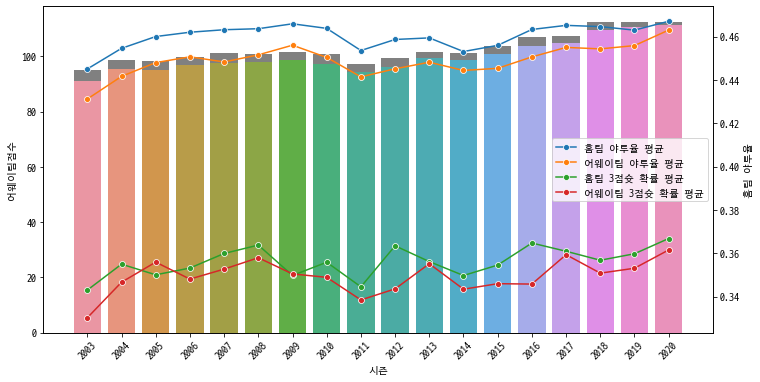

In [33]:
# 홈팀 그래프와 어웨이팀 그래프 병합
fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(rotation=45)
sns.barplot(x='시즌', y='홈팀점수', data=home_means.reset_index(), ax=ax1, color='gray')
sns.barplot(x='시즌', y='어웨이팀점수', data=away_means.reset_index(), ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(x='index', y='홈팀 야투율', marker='o', data=home_means.reset_index(), ax=ax2)
sns.lineplot(x='index', y='어웨이팀 야투율', marker='o', data=away_means.reset_index(), ax=ax2)
sns.lineplot(x='index', y='홈팀 3점슛 확률', marker='o', data=home_means.reset_index(), ax=ax2)
sns.lineplot(x='index', y='어웨이팀 3점슛 확률', marker='o', data=away_means.reset_index(), ax=ax2)
plt.legend(['홈팀 야투율 평균', '어웨이팀 야투율 평균', '홈팀 3점슛 확률 평균', '어웨이팀 3점슛 확률 평균'])
plt.show()

In [34]:
# 홈팀이 승리한 경기 수 계산
home_win = df[df['홈팀 승리'] == 1].count()['홈팀 승리']
home_win

14536

In [35]:
# 총 경기 수 계산 (2003년 시즌부터 2020년 시즌까지)
all_game = len(df.index)
all_game

24677

In [36]:
# 홈팀의 승률 계산
home_win / all_game * 100

58.90505328848725

# 가설은 2005년 3점슛 확률 평균을 제외하고 모든 데이터에 대해 성립한다.